In [93]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:

file_path = '../results.csv'
df = pd.read_csv(file_path, sep=';', names=['Algorithm', 'Threads', 'Update Ratio', "List Size", "Range", 'Throughput'])
df.head()

,Algorithm,Threads,Update Ratio,List Size,Range,Throughput
0,CoarseGrainedListBasedSet,1,0,100,200,1.027673e+07
1,CoarseGrainedListBasedSet,1,0,1000,2000,1.378451e+06
2,CoarseGrainedListBasedSet,1,0,10000,20000,5.420529e+04
3,CoarseGrainedListBasedSet,1,10,100,200,9.738200e+06
4,CoarseGrainedListBasedSet,1,10,1000,2000,5.460689e+05


In [95]:
df = df.set_index(['Algorithm', 'Update Ratio', 'List Size', 'Range'])

/var/folders/4s/j0ymfrd93c33m1_s94ffh19c0000gn/T/ipykernel_45346/2439815489.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('CoarseGrainedListBasedSet', 10, 100, 200)].plot(x='Threads', y='Throughput',
/var/folders/4s/j0ymfrd93c33m1_s94ffh19c0000gn/T/ipykernel_45346/2439815489.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('CoarseGrainedListBasedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
/var/folders/4s/j0ymfrd93c33m1_s94ffh19c0000gn/T/ipykernel_45346/2439815489.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('CoarseGrainedListBasedSet', 10, 10000, 20000)].plot(x='Threads', y='Throughput',
/var/folders/4s/j0ymfrd93c33m1_s94ffh19c0000gn/T/ipykernel_45346/2439815489.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('HandOverHandListBasedSet', 10, 100, 200)].plot(x='Threads', y='Throughput',
/var/folders/4s/j0ymfrd9

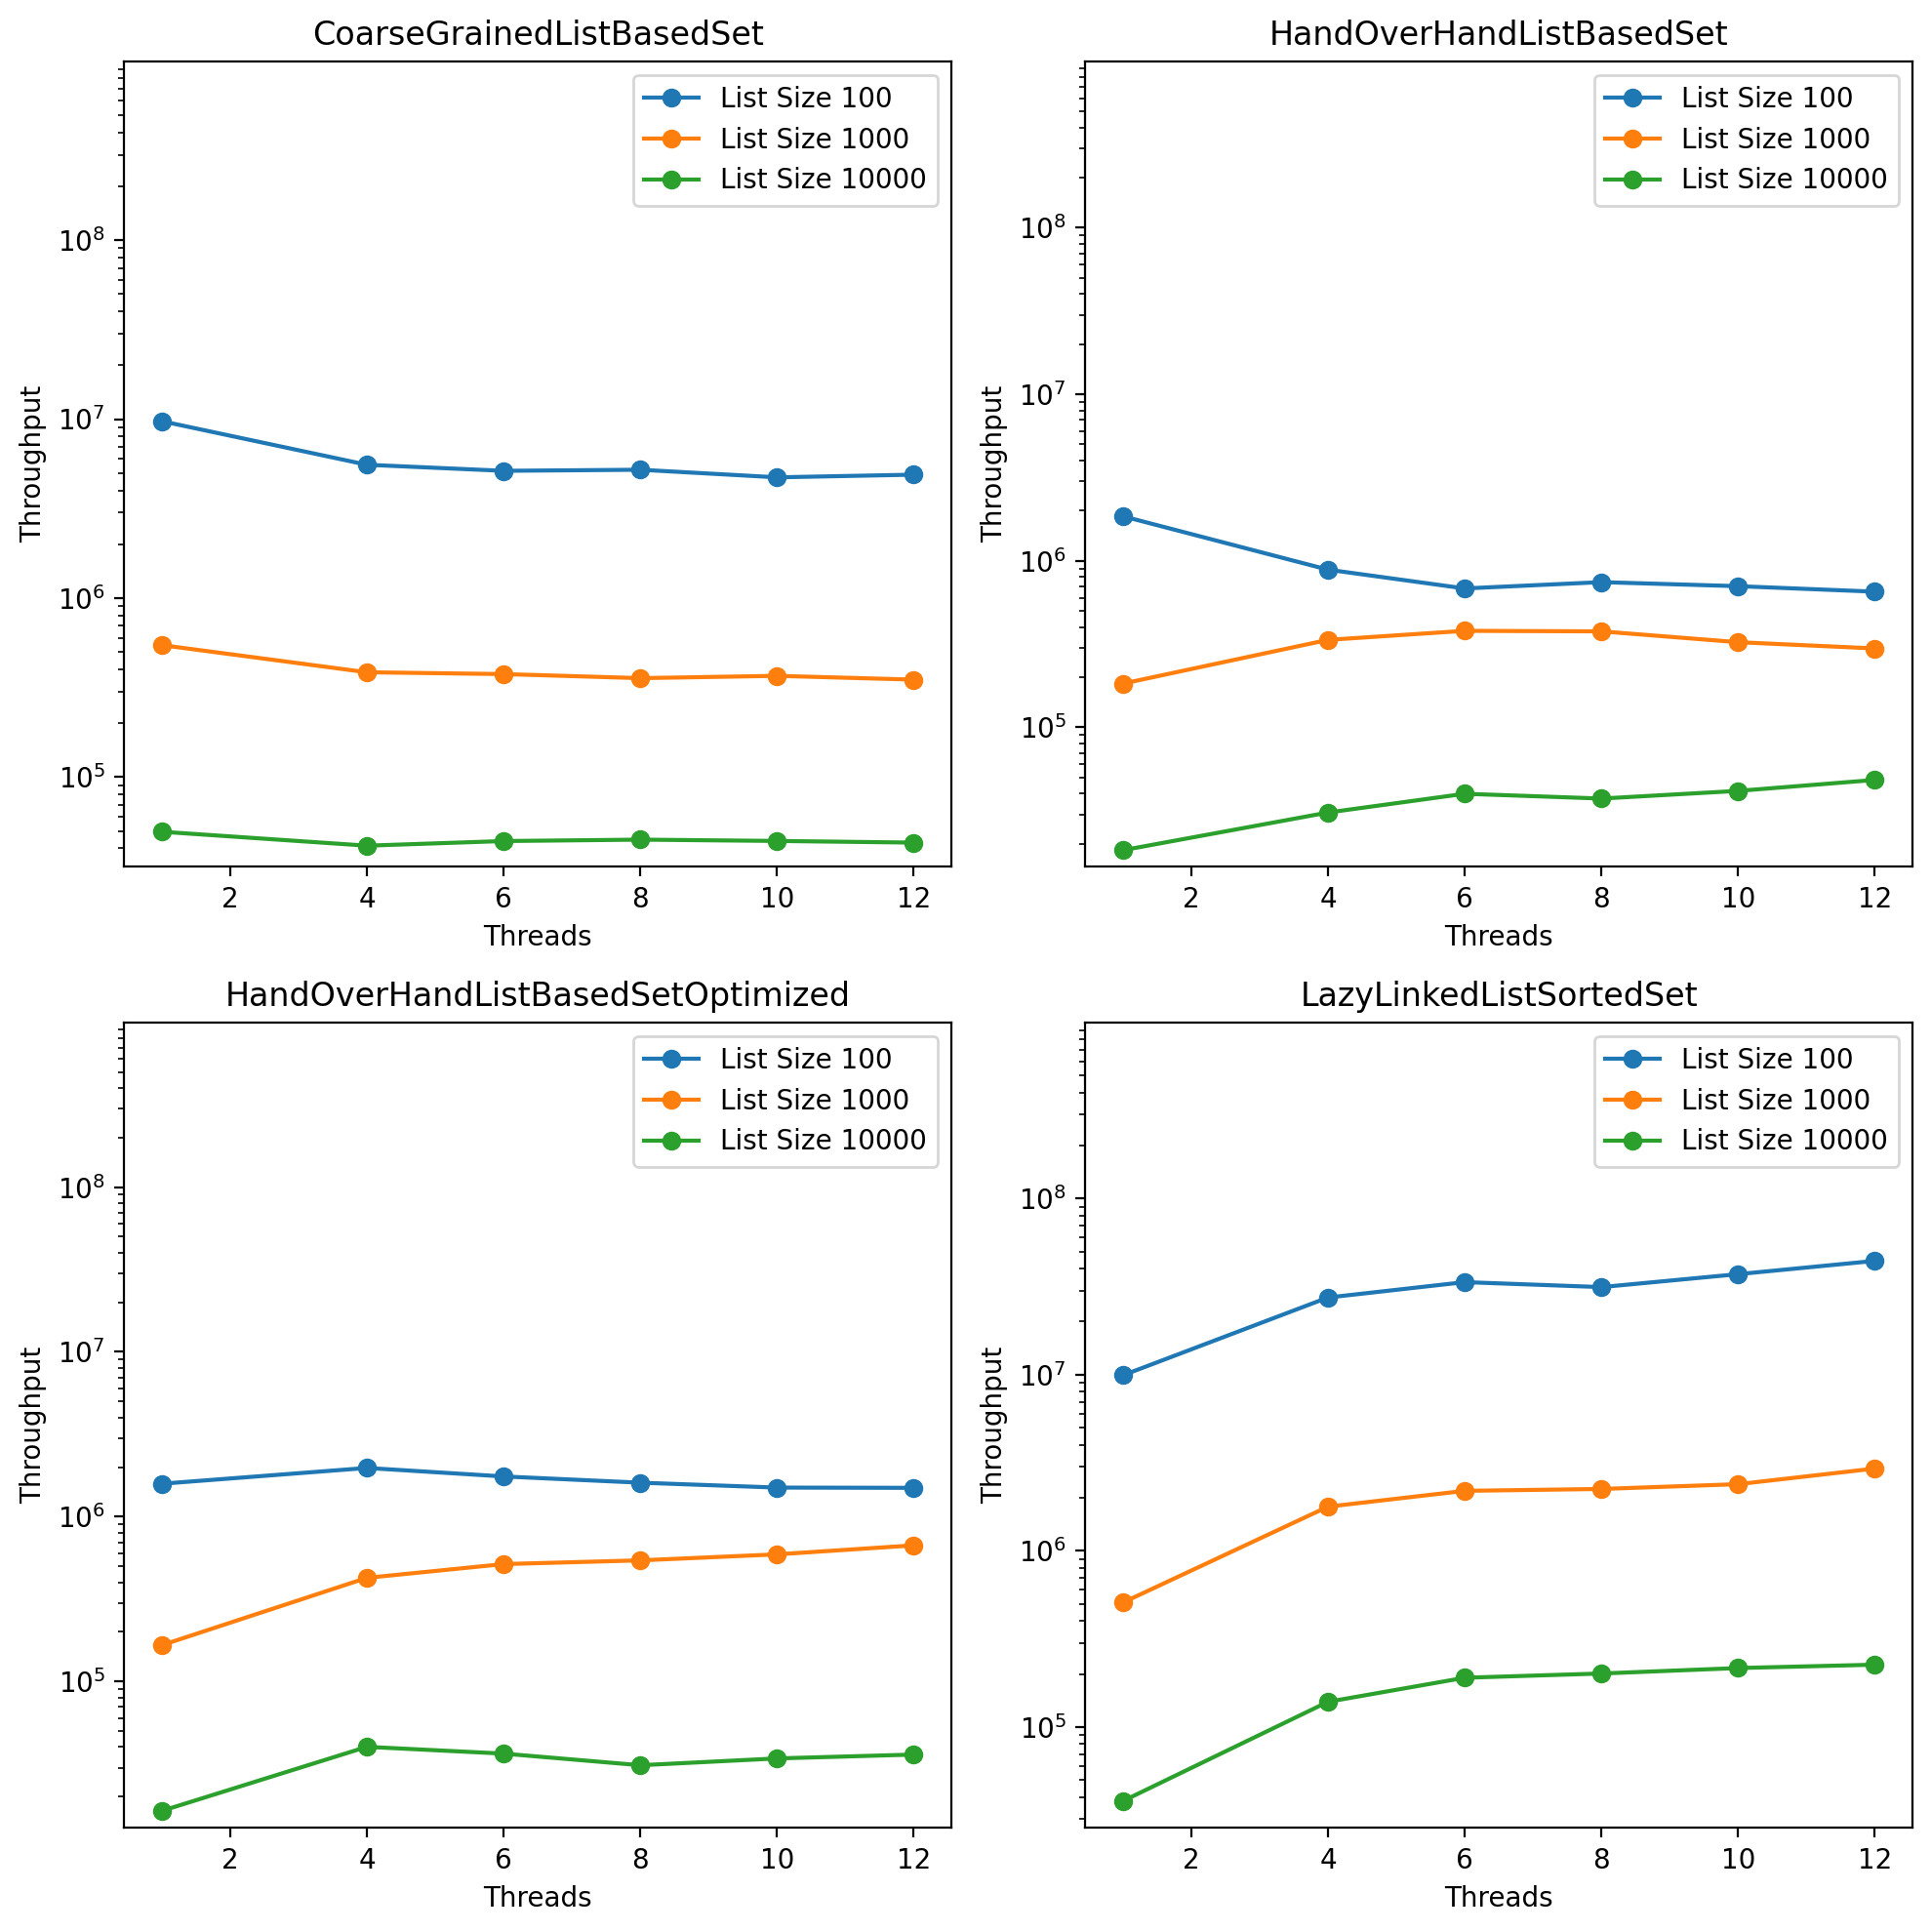

In [96]:
list_sizes = [100, 1000, 10000]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
fig.set_dpi(200)

df.loc[('CoarseGrainedListBasedSet', 10, 100, 200)].plot(x='Threads', y='Throughput',
                                                              title='CoarseGrainedListBasedSet', label='List Size 100',
                                                              logy=True, marker='o', ax = axes[0, 0])
df.loc[('CoarseGrainedListBasedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                           title='CoarseGrainedListBasedSet', ax = axes[0, 0],
                                                           label='List Size 1000', logy=True, marker='o')
df.loc[('CoarseGrainedListBasedSet', 10, 10000, 20000)].plot(x='Threads', y='Throughput',
                                                             title='CoarseGrainedListBasedSet', ax = axes[0, 0],
                                                             label='List Size 10000', logy=True, marker='o')

# ax.show()

df.loc[('HandOverHandListBasedSet', 10, 100, 200)].plot(x='Threads', y='Throughput',
                                                             title='HandOverHandListBasedSet', label='List Size 100',
                                                             logy=True, marker='o', ax = axes[0, 1])
df.loc[('HandOverHandListBasedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                          title='HandOverHandListBasedSet', ax = axes[0, 1],
                                                          label='List Size 1000', logy=True, marker='o')
df.loc[('HandOverHandListBasedSet', 10, 10000, 20000)].plot(x='Threads', y='Throughput',
                                                            title='HandOverHandListBasedSet', ax = axes[0, 1],
                                                            label='List Size 10000', logy=True, marker='o')

df.loc[('HandOverHandListBasedSetOptimized', 10, 100, 200)].plot(x='Threads', y='Throughput',
                                                                      title='HandOverHandListBasedSetOptimized',
                                                                      label='List Size 100',
                                                                      logy=True, marker='o', ax = axes[1, 0])
df.loc[('HandOverHandListBasedSetOptimized', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                                   title='HandOverHandListBasedSetOptimized',
                                                                   label='List Size 1000', logy=True, marker='o', ax = axes[1, 0])
df.loc[('HandOverHandListBasedSetOptimized', 10, 10000, 20000)].plot(x='Threads', y='Throughput',
                                                                     title='HandOverHandListBasedSetOptimized',
                                                                     label='List Size 10000', logy=True, marker='o', ax = axes[1, 0])

df.loc[('LazyLinkedListSortedSet', 10, 100, 200)].plot(x='Threads', y='Throughput',
                                                            title='LazyLinkedListSortedSet',
                                                            label='List Size 100',
                                                            logy=True, marker='o', ax = axes[1, 1])
df.loc[('LazyLinkedListSortedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                         title='LazyLinkedListSortedSet', ax = axes[1, 1],
                                                         label='List Size 1000', logy=True, marker='o')
df.loc[('LazyLinkedListSortedSet', 10, 10000, 20000)].plot(x='Threads', y='Throughput',
                                                           title='LazyLinkedListSortedSet', ax = axes[1, 1],
                                                           label='List Size 10000', logy=True, marker='o')


axes[0, 0].legend(loc='upper right')
axes[0, 1].legend(loc='upper right')
axes[1, 0].legend(loc='upper right')
axes[1, 1].legend(loc='upper right')

axes[0, 0].set_ylim((0, 10**9))
axes[0, 0].set_yticks([10**5, 10**6, 10**7, 10**8])

axes[0, 1].set_ylim((0, 10**9))
axes[0, 1].set_yticks([10**5, 10**6, 10**7, 10**8])

axes[1, 0].set_ylim((0, 10**9))
axes[1, 0].set_yticks([10**5, 10**6, 10**7, 10**8])

axes[1, 1].set_ylim((0, 10**9))
axes[1, 1].set_yticks([10**5, 10**6, 10**7, 10**8])

axes[0, 0].set_ylabel('Throughput')
axes[0, 1].set_ylabel('Throughput')
axes[1, 0].set_ylabel('Throughput')
axes[1, 1].set_ylabel('Throughput')

fig.tight_layout()

plt.savefig("graph1.png", format="png", bbox_inches="tight")

/var/folders/4s/j0ymfrd93c33m1_s94ffh19c0000gn/T/ipykernel_45346/210403836.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('CoarseGrainedListBasedSet', 0, 1000, 2000)].plot(x='Threads', y='Throughput',
/var/folders/4s/j0ymfrd93c33m1_s94ffh19c0000gn/T/ipykernel_45346/210403836.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('CoarseGrainedListBasedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
/var/folders/4s/j0ymfrd93c33m1_s94ffh19c0000gn/T/ipykernel_45346/210403836.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('CoarseGrainedListBasedSet', 100, 1000, 2000)].plot(x='Threads', y='Throughput',
/var/folders/4s/j0ymfrd93c33m1_s94ffh19c0000gn/T/ipykernel_45346/210403836.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('HandOverHandListBasedSet', 0, 1000, 2000)].plot(x='Threads', y='Throughput',
/var/folders/4s/j0ymfrd93c33

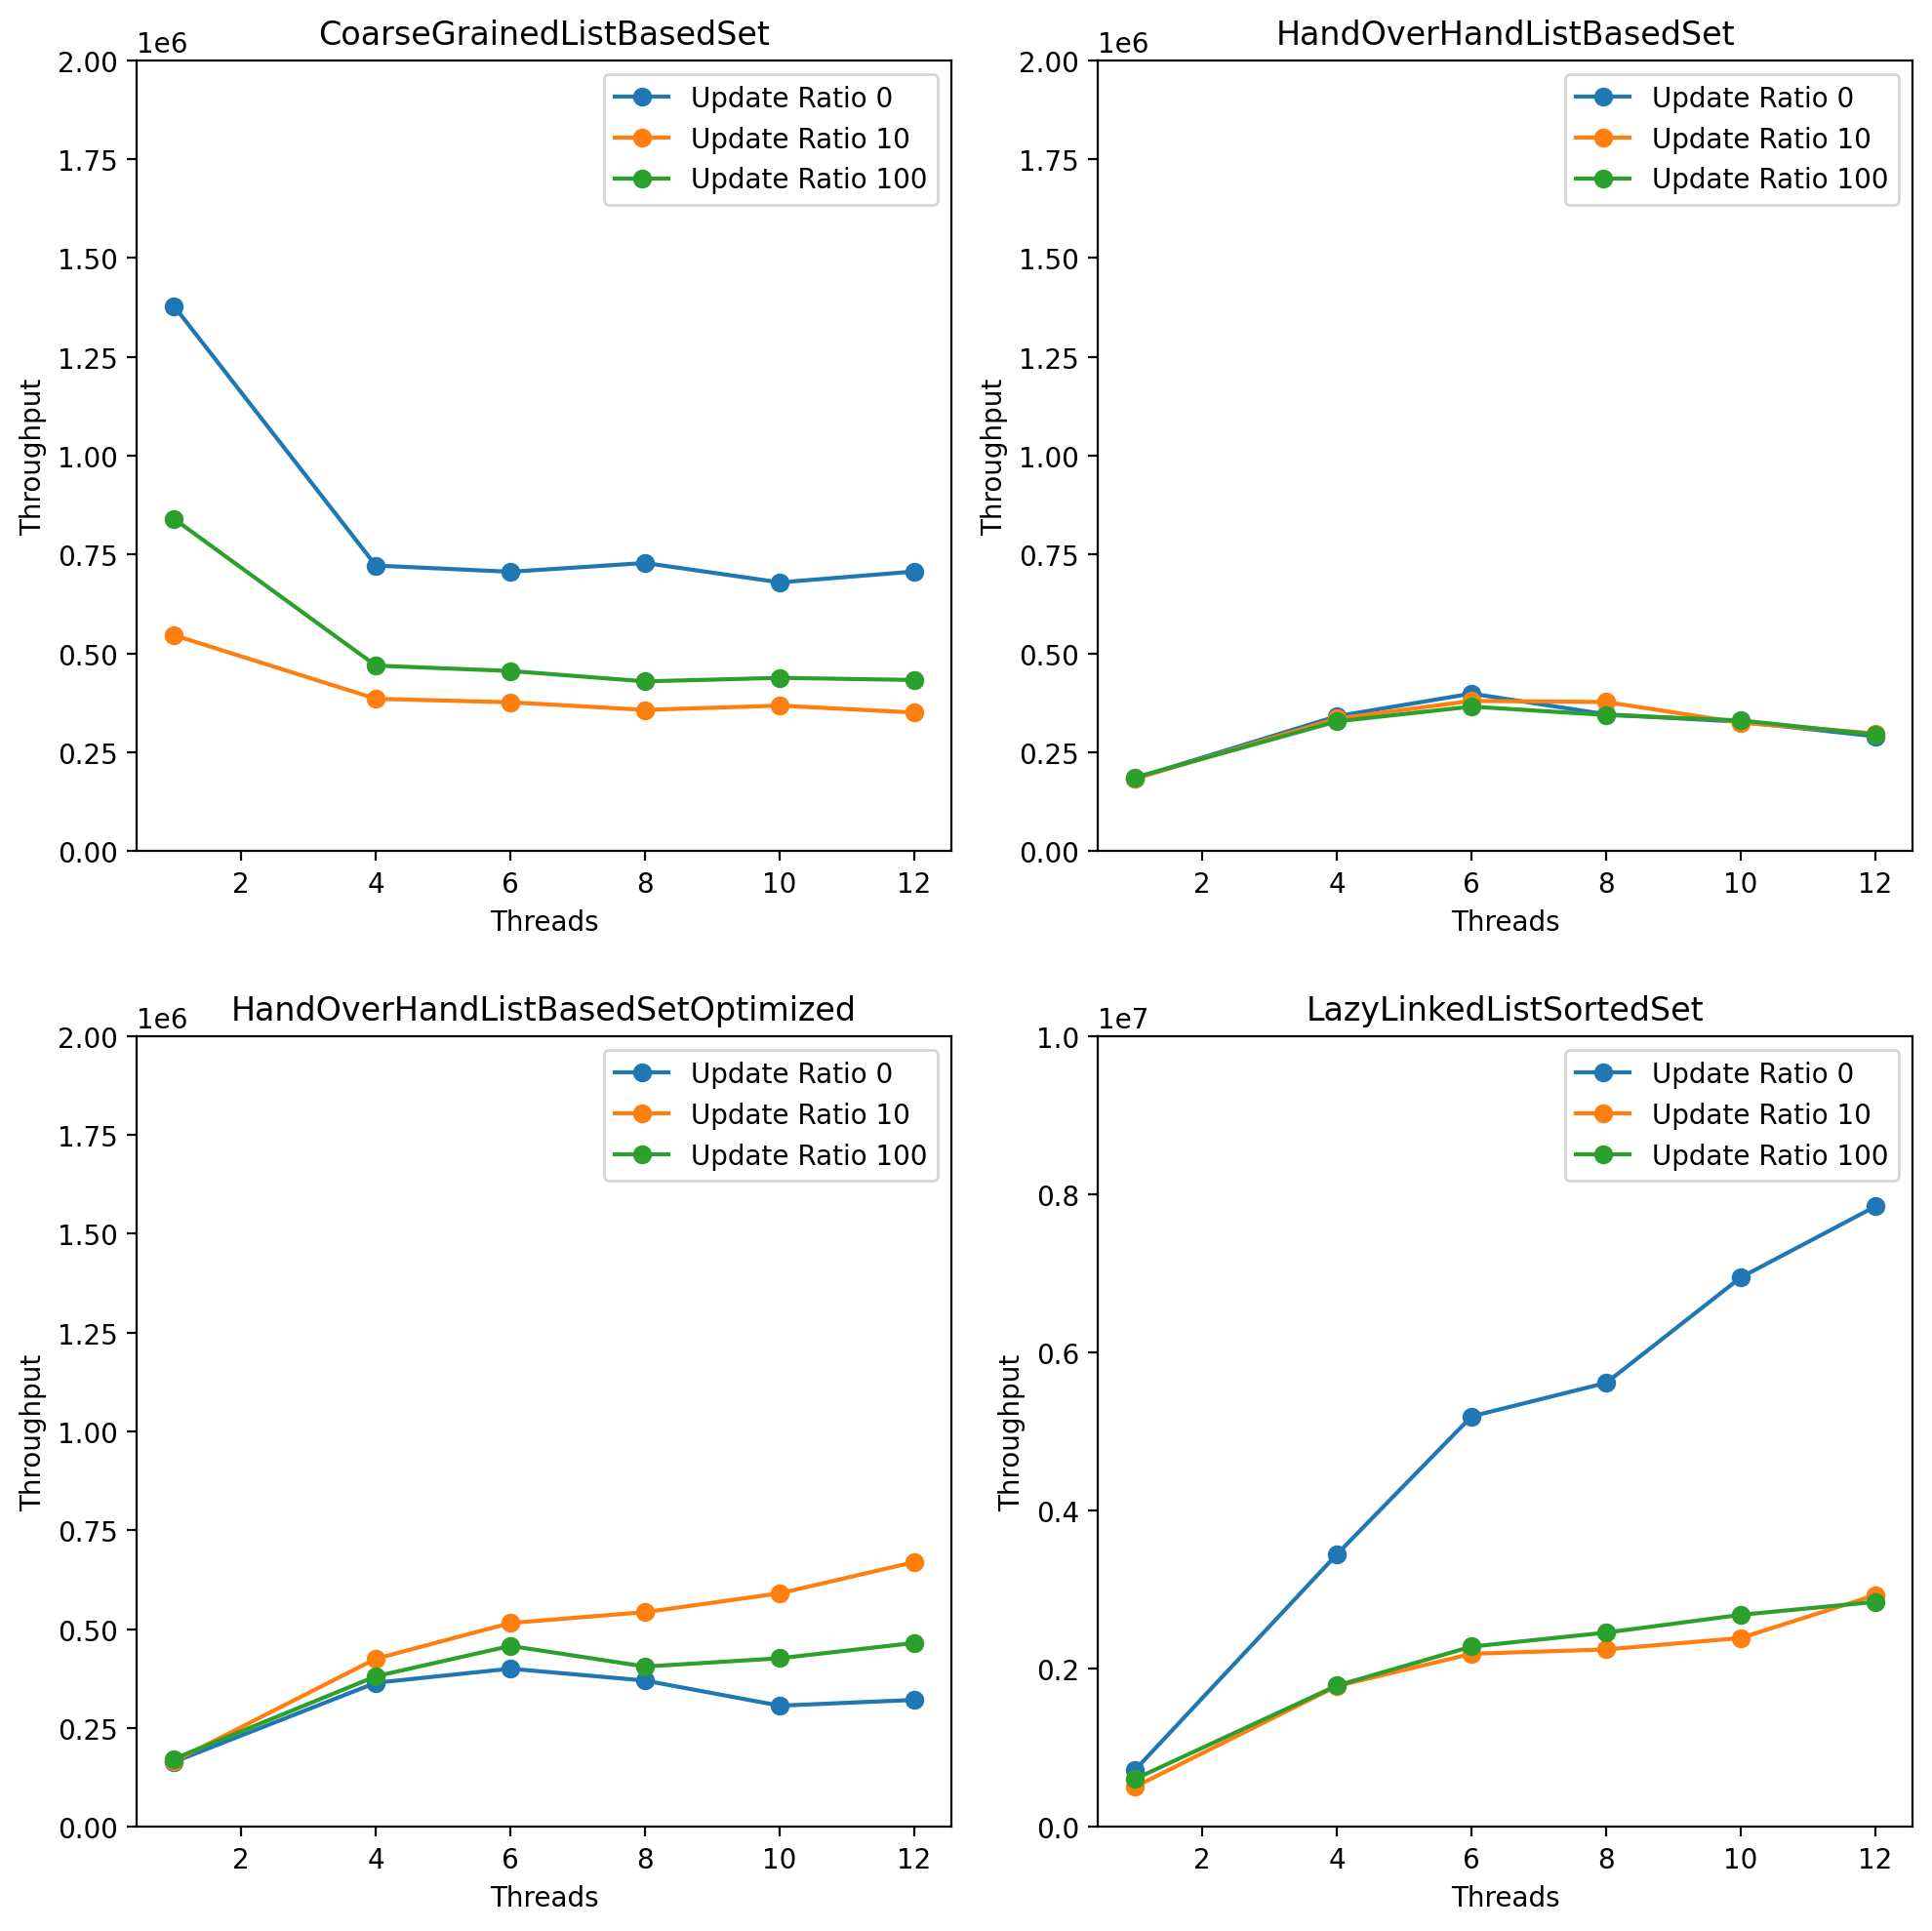

In [97]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
fig.set_dpi(200)

df.loc[('CoarseGrainedListBasedSet', 0, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                               title='CoarseGrainedListBasedSet',
                                                               label='Update Ratio 0',
                                                               logy=False, ax=axes[0, 0], marker='o')
df.loc[('CoarseGrainedListBasedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                           title='CoarseGrainedListBasedSet', ax=axes[0, 0],
                                                           label='Update Ratio 10', logy=False, marker='o')
df.loc[('CoarseGrainedListBasedSet', 100, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                            title='CoarseGrainedListBasedSet', ax=axes[0, 0],
                                                            label='Update Ratio 100', logy=False, marker='o')

# ax.show()

df.loc[('HandOverHandListBasedSet', 0, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                              title='HandOverHandListBasedSet', label='Update Ratio 0',
                                                              logy=False, ax=axes[0,1], marker='o')
df.loc[('HandOverHandListBasedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput', ax=axes[0,1],
                                                          title='HandOverHandListBasedSet',
                                                          label='Update Ratio 10', logy=False, marker='o')
df.loc[('HandOverHandListBasedSet', 100, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                           title='HandOverHandListBasedSet', ax=axes[0,1],
                                                           label='Update Ratio 100', logy=False, marker='o')

df.loc[('HandOverHandListBasedSetOptimized', 0, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                                       title='HandOverHandListBasedSetOptimized',
                                                                       label='Update Ratio 0',
                                                                       logy=False, ax=axes[1,0], marker='o')
df.loc[('HandOverHandListBasedSetOptimized', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                                   title='HandOverHandListBasedSetOptimized', ax=axes[1,0],
                                                                   label='Update Ratio 10', logy=False, marker='o')
df.loc[('HandOverHandListBasedSetOptimized', 100, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                                    title='HandOverHandListBasedSetOptimized', ax=axes[1,0],
                                                                    label='Update Ratio 100', logy=False, marker='o')

df.loc[('LazyLinkedListSortedSet', 0, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                             title='LazyLinkedListSortedSet',
                                                             label='Update Ratio 0',
                                                             logy=False,ax=axes[1,1], marker='o')
df.loc[('LazyLinkedListSortedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                         title='LazyLinkedListSortedSet', ax=axes[1,1],
                                                         label='Update Ratio 10', logy=False, marker='o')
df.loc[('LazyLinkedListSortedSet', 100, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                          title='LazyLinkedListSortedSet', ax=axes[1,1],
                                                          label='Update Ratio 100', logy=False, marker='o')


axes[0, 0].legend(loc='upper right')
axes[0, 1].legend(loc='upper right')
axes[1, 0].legend(loc='upper right')
axes[1, 1].legend(loc='upper right')

axes[0, 0].set_ylim((0, 2000000))
# axes[0, 0].set_yticks([10**5, 10**6, 10**7, 10**8])

axes[0, 1].set_ylim((0, 2000000))
# axes[0, 1].set_yticks([10**5, 10**6, 10**7, 10**8])

axes[1, 0].set_ylim((0, 2000000))
# axes[1, 0].set_yticks([10**5, 10**6, 10**7, 10**8])

axes[1, 1].set_ylim((0, 10**7))
# axes[1, 1].set_yticks([10**5, 10**6, 10**7, 10**8])

axes[0, 0].set_ylabel('Throughput')
axes[0, 1].set_ylabel('Throughput')
axes[1, 0].set_ylabel('Throughput')
axes[1, 1].set_ylabel('Throughput')
fig.tight_layout()
plt.savefig("graph2.png", format="png", bbox_inches="tight")

/var/folders/4s/j0ymfrd93c33m1_s94ffh19c0000gn/T/ipykernel_45346/1907442998.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('CoarseGrainedListBasedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
/var/folders/4s/j0ymfrd93c33m1_s94ffh19c0000gn/T/ipykernel_45346/1907442998.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('HandOverHandListBasedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput', ax=ax,
/var/folders/4s/j0ymfrd93c33m1_s94ffh19c0000gn/T/ipykernel_45346/1907442998.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('HandOverHandListBasedSetOptimized', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
/var/folders/4s/j0ymfrd93c33m1_s94ffh19c0000gn/T/ipykernel_45346/1907442998.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('LazyLinkedListSortedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput',


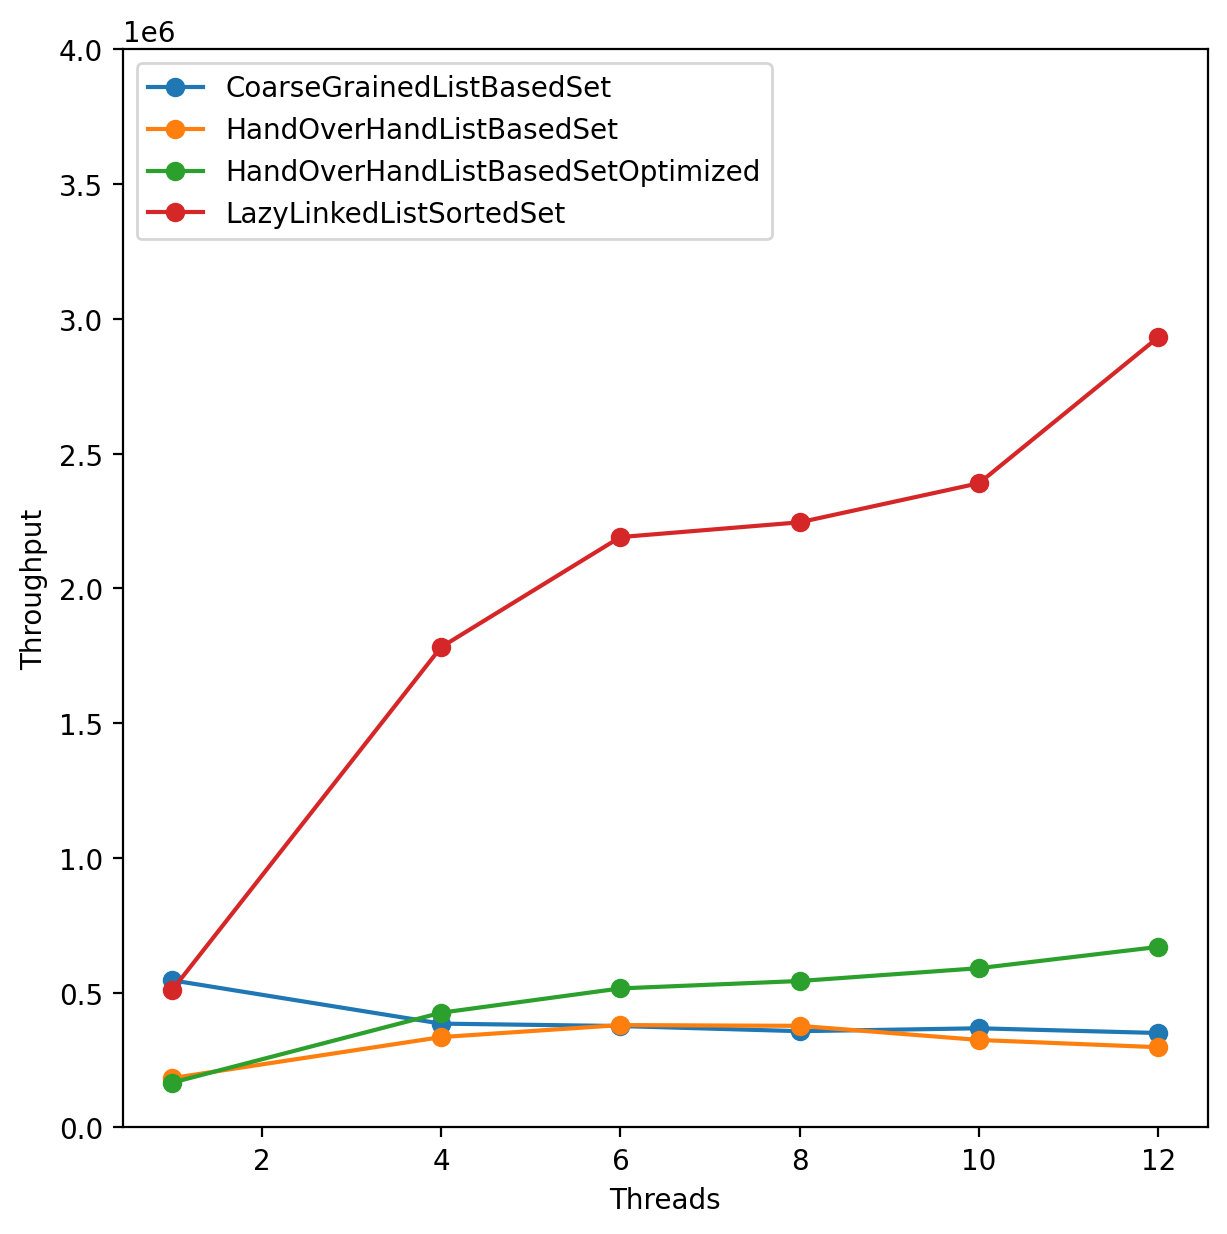

In [98]:
fig, ax = plt.subplots()

df.loc[('CoarseGrainedListBasedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                                label='CoarseGrainedListBasedSet',
                                                                logy=False, marker='o', ax=ax)
df.loc[('HandOverHandListBasedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput', ax=ax,
                                                          label='HandOverHandListBasedSet', logy=False, marker='o')
df.loc[('HandOverHandListBasedSetOptimized', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                                   ax=ax,
                                                                   label='HandOverHandListBasedSetOptimized',
                                                                   logy=False, marker='o')
df.loc[('LazyLinkedListSortedSet', 10, 1000, 2000)].plot(x='Threads', y='Throughput',
                                                         ax=ax,
                                                         label='LazyLinkedListSortedSet', logy=False, marker='o')

ax.set_ylim((0, 4* 10**6))
ax.legend(loc='upper left')
ax.set_ylabel('Throughput')
fig.set_dpi(200)
fig.set_size_inches(7, 7)
plt.savefig("graph3.png", format="png", bbox_inches="tight")